In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
banknotes=pd.read_csv("banknote_auth.csv")

Matplotlib is building the font cache; this may take a moment.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scala

<IPython.core.display.Javascript object>

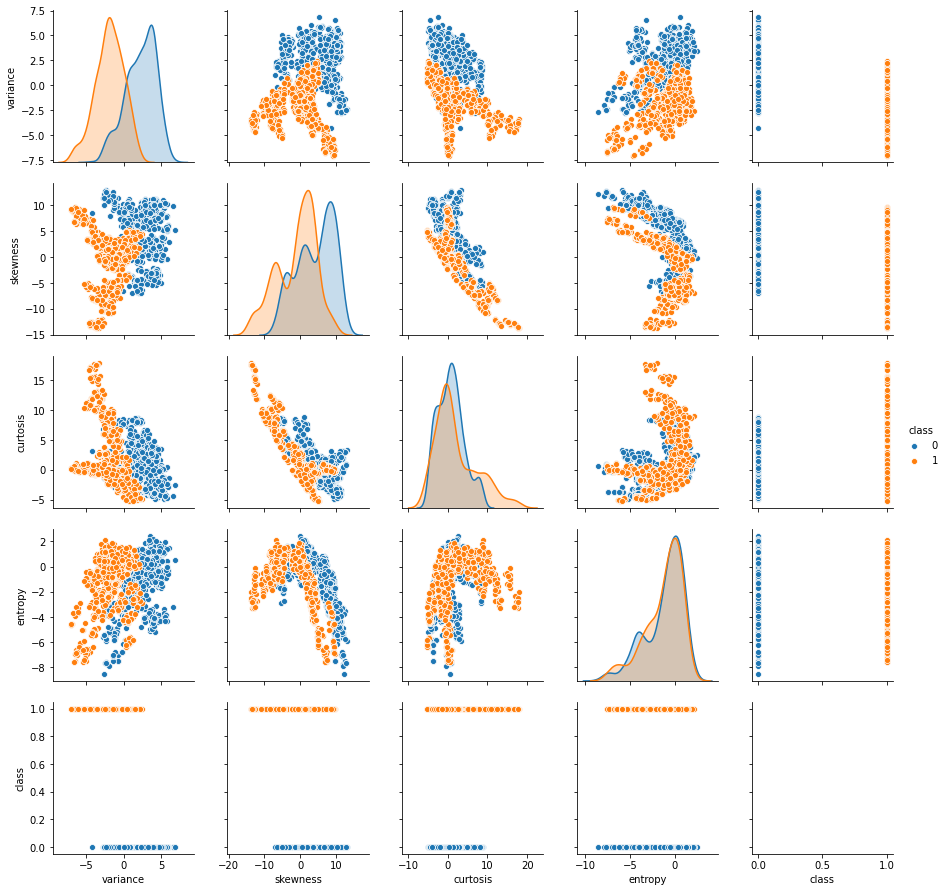

Dataset stats: 
           variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [2]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue="class") 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes["class"].value_counts())

In [7]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split 
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation="sigmoid"))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Display a summary of your model
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_train, X_test, y_train, y_test = train_test_split(banknotes.drop(["class"],axis=1),banknotes["class"],test_size=0.33,random_state=53)

In [6]:
# Train your model for 20 epochs
model.fit(X_train,y_train, epochs =20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test,y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Train on 919 samples
Epoch 1/20
919/919 [==============================] - 2s 2ms/sample - loss: 0.9861 - accuracy: 0.6007
Epoch 2/20
919/919 [==============================] - 0s 78us/sample - loss: 0.6307 - accuracy: 0.7116
Epoch 3/20
919/919 [==============================] - 0s 90us/sample - loss: 0.4438 - accuracy: 0.8248
Epoch 4/20
919/919 [==============================] - 0s 71us/sample - loss: 0.3517 - accuracy: 0.8770
Epoch 5/20
919/919 [==============================] - 0s 98us/sample - loss: 0.3014 - accuracy: 0.8977
Epoch 6/20
919/919 [==============================] - 0s 89us/sample - loss: 0.2681 - accuracy: 0.9042
Epoch 7/20
919/919 [==============================] - 0s 80us/sample - loss: 0.2442 - accuracy: 0.9184
Epoch 8/20
919/919 [==============================] - 0s 75us/sample - loss: 0.2259 - accuracy: 0.9249
Epoch 9/20
919/919 [==============================] - 0s 75us/sample - loss: 0.2109 - accuracy: 0.9282
Epoch 10/20
919/919 [==============================] 